In [ ]:
!pip install folium

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import xmltodict
import json
import folium
#경기데이터드림

In [2]:
df_learning=pd.read_csv('data/장애인_복지관.csv')
df_learning

,시군명,사업장명,인허가일자,영업상태명,입소정원(명),자격소유인원수(명),총인원수(명),소재지도로명주소,소재지주소,소재지우편번호,위도,경도
0,가평군,가평군 장애인복지관,20111228,운영중,0,10.0,3.0,NaN,경기도 가평군 가평읍 읍내리,NaN,37.835778,127.510893
1,고양시,고양시장애인종합복지관,20040402,운영중,0,21.0,36.0,경기도 고양시 일산서구 탄현로 139,경기도 고양시 일산서구 탄현동 111-1번지,10239.0,37.703120,126.764852
2,과천시,과천시장애인복지관,20110601,운영중,200,14.0,46.0,경기도 과천시 문원로 40,경기도 과천시 문원동 31-3번지,13828.0,37.428777,127.001978
3,광명시,광명장애인종합복지관,20001019,운영중,80,30.0,37.0,경기도 광명시 목감로 120,경기도 광명시 광명동 164-2번지,14284.0,37.478734,126.846819
4,광주시,성분도복지관,20010608,운영중,0,NaN,NaN,NaN,경기도 광주시 도척면,NaN,37.311840,127.320948
...,...,...,...,...,...,...,...,...,...,...,...,...
104,광명시,광명장애인종합복지관,20001019,운영중,80,30.0,37.0,경기도 광명시 목감로 120,경기도 광명시 광명동 164-2번지,14284.0,37.655248,127.244568
105,광주시,성분도복지관,20010608,운영중,0,NaN,NaN,NaN,경기도 광주시 도척면,NaN,37.250593,127.064110
106,구리시,구리시장애인종합복지관,20000811,운영중,0,28.0,33.0,경기도 구리시 이문안로 86-1,경기도 구리시 수택동 851-1번지,11940.0,37.328816,126.810306
107,군포시,군포시장애인종합복지관,19991130,운영중,0,26.0,34.0,경기도 군포시 청백리길 18,경기도 군포시 금정동 844-1번지,15829.0,37.600616,127.142800


In [ ]:
df_location[df_location['시군명']=='성남시']

In [ ]:
from matplotlib import font_manager,rc
import matplotlib
font_location='c:/Windows/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(df_location['시군명'].value_counts().index, df_location['시군명'].value_counts().values )
plt.xlabel('담당 구청', size = 20)
plt.ylabel('Values', size = 25)
plt.xticks(rotation=50, size=20)
plt.title('지역구별 장애인 관광지', size = 25)

In [ ]:
!pip install folium

In [ ]:
map.save('index.html')

In [ ]:
mark=df_location
mark

In [ ]:
map=folium.Map(location=[mark['위도'].mean() ,mark['경도'].mean()])
for i in range ( 0, mark.shape[0]) : 
    folium.Marker([mark['위도'][i] ,mark['경도'][i]],popup=mark['사업장명'][i]).add_to(map)

In [ ]:
map

In [3]:
from sklearn.cluster import KMeans

In [4]:
df_learning.loc[:,['경도','위도']]

,경도,위도
0,127.510893,37.835778
1,126.764852,37.703120
2,127.001978,37.428777
3,126.846819,37.478734
4,127.320948,37.311840
...,...,...
104,127.244568,37.655248
105,127.064110,37.250593
106,126.810306,37.328816
107,127.142800,37.600616


In [5]:
X=df_learning.loc[:,['경도','위도']].values
X

array([[127.510893  ,  37.835778  ],
       [126.764852  ,  37.70312   ],
       [127.001978  ,  37.428777  ],
       [126.846819  ,  37.478734  ],
       [127.320948  ,  37.31184   ],
       [127.141006  ,  37.591451  ],
       [126.934125  ,  37.363002  ],
       [126.680254  ,  37.641393  ],
       [127.200362  ,  37.626838  ],
       [127.047921  ,  37.90712   ],
       [126.813653  ,  37.517482  ],
       [127.163341  ,  37.436149  ],
       [127.126382  ,  37.416072  ],
       [126.741083  ,  37.347532  ],
       [126.741083  ,  37.347532  ],
       [126.806462  ,  37.32583   ],
       [126.830815  ,  37.298663  ],
       [127.284776  ,  36.994719  ],
       [126.9207    ,  37.41244   ],
       [126.927229  ,  37.384748  ],
       [127.500941  ,  37.496374  ],
       [127.635454  ,  37.301936  ],
       [127.047811  ,  37.178176  ],
       [127.087646  ,  37.324031  ],
       [127.105686  ,  37.315205  ],
       [127.218923  ,  37.259324  ],
       [127.003987  ,  37.348164  ],
 

In [19]:
kmeans=KMeans(n_clusters=5)

In [20]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [21]:
kmeans.predict(X)

array([0, 4, 1, 1, 3, 2, 1, 4, 2, 2, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 0, 0,
       3, 3, 3, 3, 3, 2, 2, 0, 4, 3, 3, 2, 3, 3, 1, 1, 1, 3, 1, 3, 4, 2,
       3, 3, 1, 3, 1, 2, 1, 1, 3, 4, 4, 4, 3, 1, 2, 1, 3, 1, 3, 2, 2, 3,
       4, 4, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 3, 4, 2, 1,
       1, 4, 4, 2, 3, 0, 1, 2, 1, 3, 1, 2, 4, 3, 3, 1, 2, 3, 1, 2, 3])

In [22]:
kmeans.labels_

array([0, 4, 1, 1, 3, 2, 1, 4, 2, 2, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 0, 0,
       3, 3, 3, 3, 3, 2, 2, 0, 4, 3, 3, 2, 3, 3, 1, 1, 1, 3, 1, 3, 4, 2,
       3, 3, 1, 3, 1, 2, 1, 1, 3, 4, 4, 4, 3, 1, 2, 1, 3, 1, 3, 2, 2, 3,
       4, 4, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 3, 4, 2, 1,
       1, 4, 4, 2, 3, 0, 1, 2, 1, 3, 1, 2, 4, 3, 3, 1, 2, 3, 1, 2, 3])

In [23]:
df_learning['클러스터번호']=kmeans.predict(X)
df_learning

,시군명,사업장명,인허가일자,영업상태명,입소정원(명),자격소유인원수(명),총인원수(명),소재지도로명주소,소재지주소,소재지우편번호,위도,경도,클러스터번호
0,가평군,가평군 장애인복지관,20111228,운영중,0,10.0,3.0,NaN,경기도 가평군 가평읍 읍내리,NaN,37.835778,127.510893,0
1,고양시,고양시장애인종합복지관,20040402,운영중,0,21.0,36.0,경기도 고양시 일산서구 탄현로 139,경기도 고양시 일산서구 탄현동 111-1번지,10239.0,37.703120,126.764852,4
2,과천시,과천시장애인복지관,20110601,운영중,200,14.0,46.0,경기도 과천시 문원로 40,경기도 과천시 문원동 31-3번지,13828.0,37.428777,127.001978,1
3,광명시,광명장애인종합복지관,20001019,운영중,80,30.0,37.0,경기도 광명시 목감로 120,경기도 광명시 광명동 164-2번지,14284.0,37.478734,126.846819,1
4,광주시,성분도복지관,20010608,운영중,0,NaN,NaN,NaN,경기도 광주시 도척면,NaN,37.311840,127.320948,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,광명시,광명장애인종합복지관,20001019,운영중,80,30.0,37.0,경기도 광명시 목감로 120,경기도 광명시 광명동 164-2번지,14284.0,37.655248,127.244568,2
105,광주시,성분도복지관,20010608,운영중,0,NaN,NaN,NaN,경기도 광주시 도척면,NaN,37.250593,127.064110,3
106,구리시,구리시장애인종합복지관,20000811,운영중,0,28.0,33.0,경기도 구리시 이문안로 86-1,경기도 구리시 수택동 851-1번지,11940.0,37.328816,126.810306,1
107,군포시,군포시장애인종합복지관,19991130,운영중,0,26.0,34.0,경기도 군포시 청백리길 18,경기도 군포시 금정동 844-1번지,15829.0,37.600616,127.142800,2


In [18]:
kmeans.inertia_

0.5523725741715932

In [24]:
df_learning.groupby('클러스터번호')['경도','위도'].mean()

<ipython-input-24-74c285a243ab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_learning.groupby('클러스터번호')['경도','위도'].mean()


,경도,위도
클러스터번호,,
0,127.514832,37.499740
1,126.860892,37.380306
2,127.130585,37.721887
3,127.111423,37.283622
4,126.763368,37.710149


In [26]:
df_learning.groupby('클러스터번호')['사업장명'].count()

클러스터번호
0     5
1    37
2    21
3    33
4    13
Name: 사업장명, dtype: int64

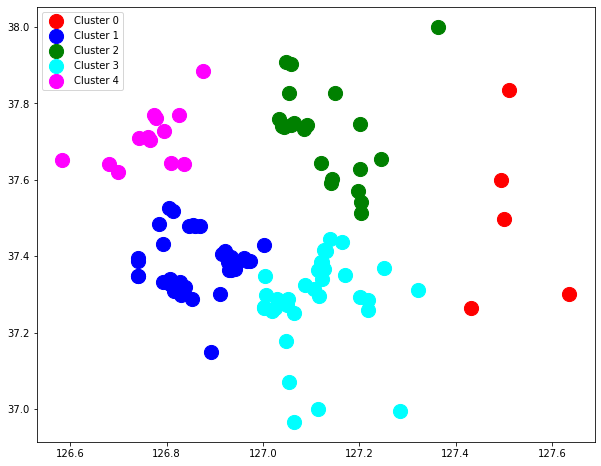

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(df_learning[df_learning['클러스터번호']==0]['경도'],
              df_learning[df_learning['클러스터번호']==0]['위도'],
           c='red', s=200, label = 'Cluster 0')
plt.scatter(df_learning[df_learning['클러스터번호']==1]['경도'],
              df_learning[df_learning['클러스터번호']==1]['위도'],
           c='blue', s=200, label = 'Cluster 1')
plt.scatter(df_learning[df_learning['클러스터번호']==2]['경도'],
              df_learning[df_learning['클러스터번호']==2]['위도'],
           c='green', s=200, label = 'Cluster 2')
plt.scatter(df_learning[df_learning['클러스터번호']==3]['경도'],
              df_learning[df_learning['클러스터번호']==3]['위도'],
           c='cyan', s=200, label = 'Cluster 3')
plt.scatter(df_learning[df_learning['클러스터번호']==4]['경도'],
              df_learning[df_learning['클러스터번호']==4]['위도'],
           c='magenta', s=200, label = 'Cluster 4')
plt.legend()